Exercise 1 : Visualizing The Distribution Of CGPA

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mental_health = pd.read_csv('Student Mental health.csv')

In [82]:
mental_health

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [83]:
mental_health = mental_health.rename(columns={'What is your CGPA?':'CGPA','Your current year of Study':'Year of study','Choose your gender':'Gender','Do you have Depression?':'Depression','Do you have Anxiety?':'Anxiety','Do you have Panic attack?':'Panic attack','Did you seek any specialist for a treatment?':'treatment'})

In [84]:
mental_health

,Timestamp,Gender,Age,What is your course?,Year of study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [85]:
mental_health.isnull().sum()

Timestamp               0
Gender                  0
Age                     1
What is your course?    0
Year of study           0
CGPA                    0
Marital status          0
Depression              0
Anxiety                 0
Panic attack            0
treatment               0
dtype: int64

In [86]:
mental_health = mental_health.dropna()
mental_health = mental_health.drop_duplicates()

In [87]:
mental_health.isnull().sum()

Timestamp               0
Gender                  0
Age                     0
What is your course?    0
Year of study           0
CGPA                    0
Marital status          0
Depression              0
Anxiety                 0
Panic attack            0
treatment               0
dtype: int64

In [88]:
mental_health['CGPA'].unique()
mental_health['CGPA'] =mental_health['CGPA'].str.replace('3.50 - 4.00 ','3.50 - 4.00')

In [89]:
mental_health['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

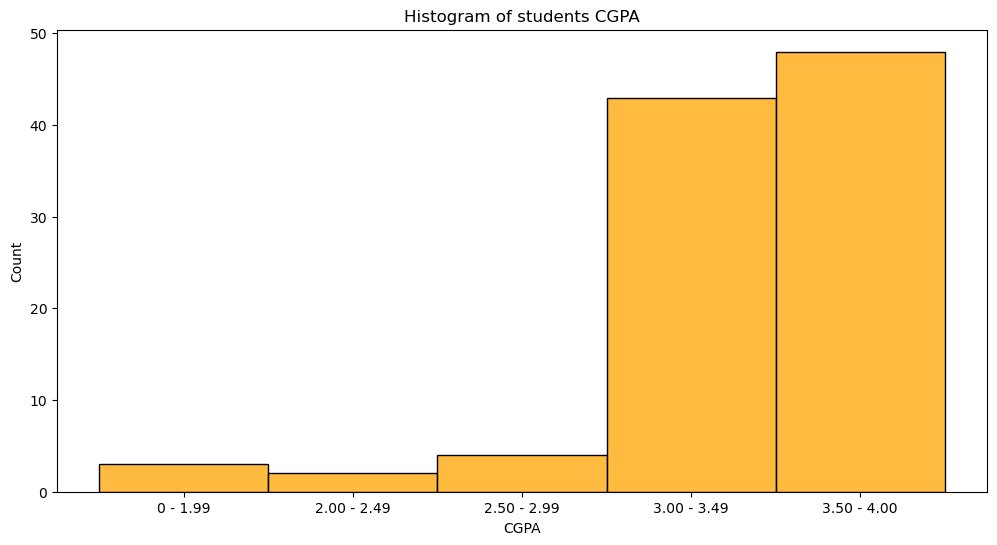

In [90]:
plt.figure(figsize=(12, 6)) 
sns.histplot(mental_health['CGPA'].sort_values(),color='orange',edgecolor='black')
plt.title('Histogram of students CGPA')
plt.show()

Exercise 2: Comparing Anxiety Levels Across Different Genders

In [91]:
mental_health['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [92]:
mental_health_across_gender = mental_health.groupby('Gender')['Anxiety'].value_counts('Yes').reset_index()

In [93]:
mental_health_across_gender

,Gender,Anxiety,proportion
0,Female,No,0.68
1,Female,Yes,0.32
2,Male,No,0.60
3,Male,Yes,0.40


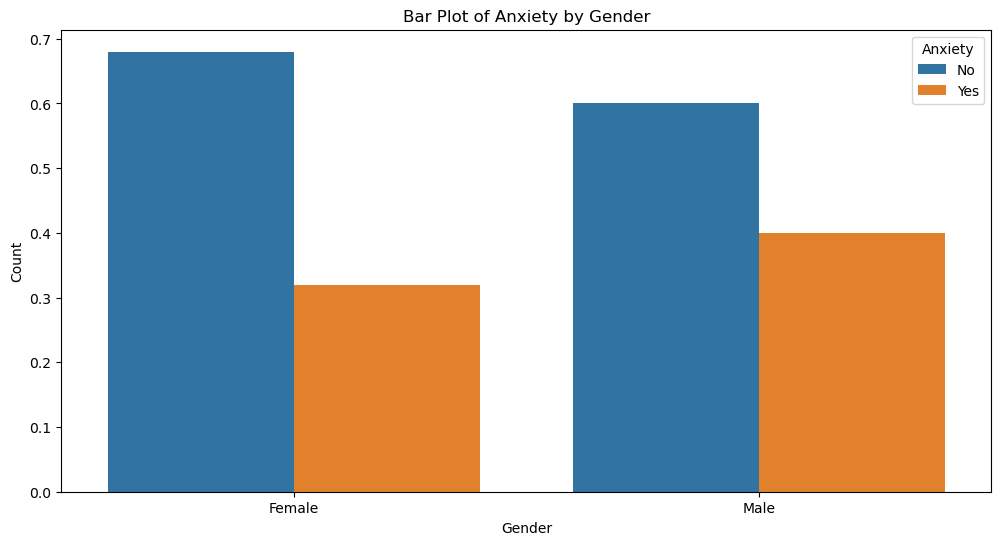

In [101]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Gender', y='proportion', hue='Anxiety', data=mental_health_across_gender)
plt.title('Bar Plot of Anxiety by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

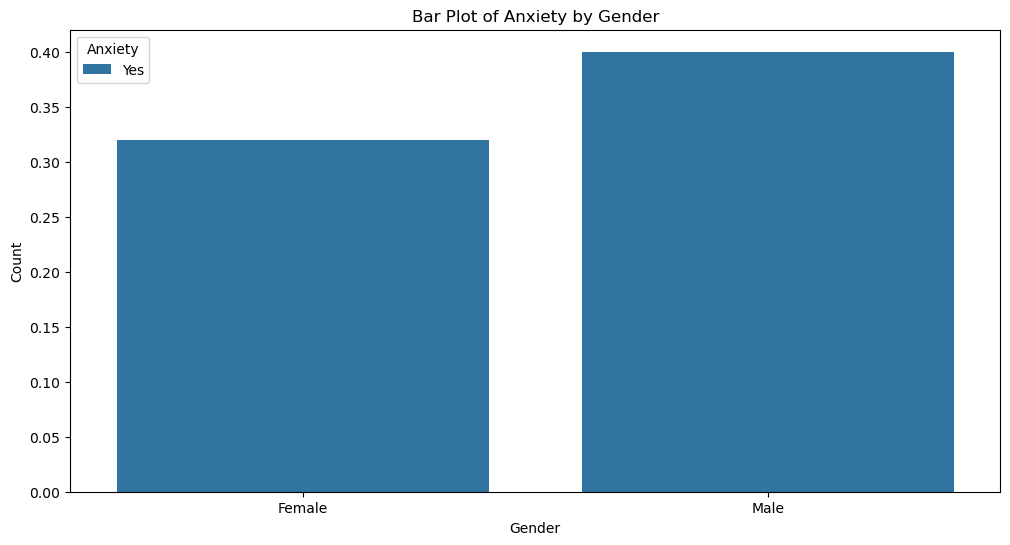

In [94]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Gender', y='proportion', hue='Anxiety', data=mental_health_across_gender[mental_health_across_gender['Anxiety']=='Yes'])
plt.title('Bar Plot of Anxiety by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Exercise 3: Exploring The Relationship Between Age And Panic Attacks

In [98]:
mental_health

,Timestamp,Gender,Age,What is your course?,Year of study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


<Axes: xlabel='Age', ylabel='proportion'>

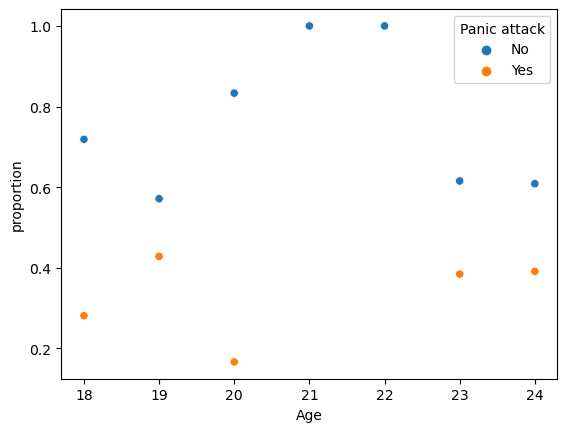

In [96]:
mental_health['Panic attack'].unique()

panic_by_ages = mental_health.groupby('Age')['Panic attack'].value_counts('Yes').reset_index()

sns.scatterplot(x='Age', y='proportion',hue='Panic attack', data=panic_by_ages)

In [97]:
panic_by_ages

,Age,Panic attack,proportion
0,18.0,No,0.718750
1,18.0,Yes,0.281250
2,19.0,No,0.571429
3,19.0,Yes,0.428571
4,20.0,No,0.833333
5,20.0,Yes,0.166667
6,21.0,No,1.000000
7,22.0,No,1.000000
8,23.0,No,0.615385
9,23.0,Yes,0.384615


In [113]:
# mental_health['Panic attack'] = mental_health['Panic attack'].replace({'Yes': 1, 'No': 0})

# plt.figure(figsize=(10, 6))  
# sns.scatterplot(x='Age', y='Panic attack', data=mental_health)
# plt.title('Relationship Between Age and Panic Attacks')
# plt.xlabel('Age')
# plt.ylabel('Panic Attacks (0=No, 1=Yes)')
# plt.show()

In [80]:
mental_health

,Timestamp,Gender,Age,What is your course?,Year of study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,NaN,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,NaN,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,NaN,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,NaN,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,NaN,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,NaN,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,NaN,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,NaN,No


Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot

In [103]:
subset = mental_health[['Age','CGPA','Depression','Anxiety','Panic attack']]

In [104]:
subset

,Age,CGPA,Depression,Anxiety,Panic attack
0,18.0,3.00 - 3.49,Yes,No,1
1,21.0,3.00 - 3.49,No,Yes,0
2,19.0,3.00 - 3.49,Yes,Yes,1
3,22.0,3.00 - 3.49,Yes,No,0
4,23.0,3.00 - 3.49,No,No,0
...,...,...,...,...,...
96,21.0,3.50 - 4.00,No,Yes,0
97,18.0,3.00 - 3.49,Yes,Yes,0
98,19.0,3.50 - 4.00,Yes,No,1
99,23.0,3.50 - 4.00,No,No,0


In [110]:
subset['Depression'] = subset['Depression'].replace({'Yes': 1, 'No': 0})
subset['Anxiety'] = subset['Anxiety'].replace({'Yes': 1, 'No': 0})

C:\Users\v_gol\AppData\Local\Temp\ipykernel_4828\1310405210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Depression'] = subset['Depression'].replace({'Yes': 1, 'No': 0})
C:\Users\v_gol\AppData\Local\Temp\ipykernel_4828\1310405210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Anxiety'] = subset['Anxiety'].replace({'Yes': 1, 'No': 0})


c:\Users\v_gol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


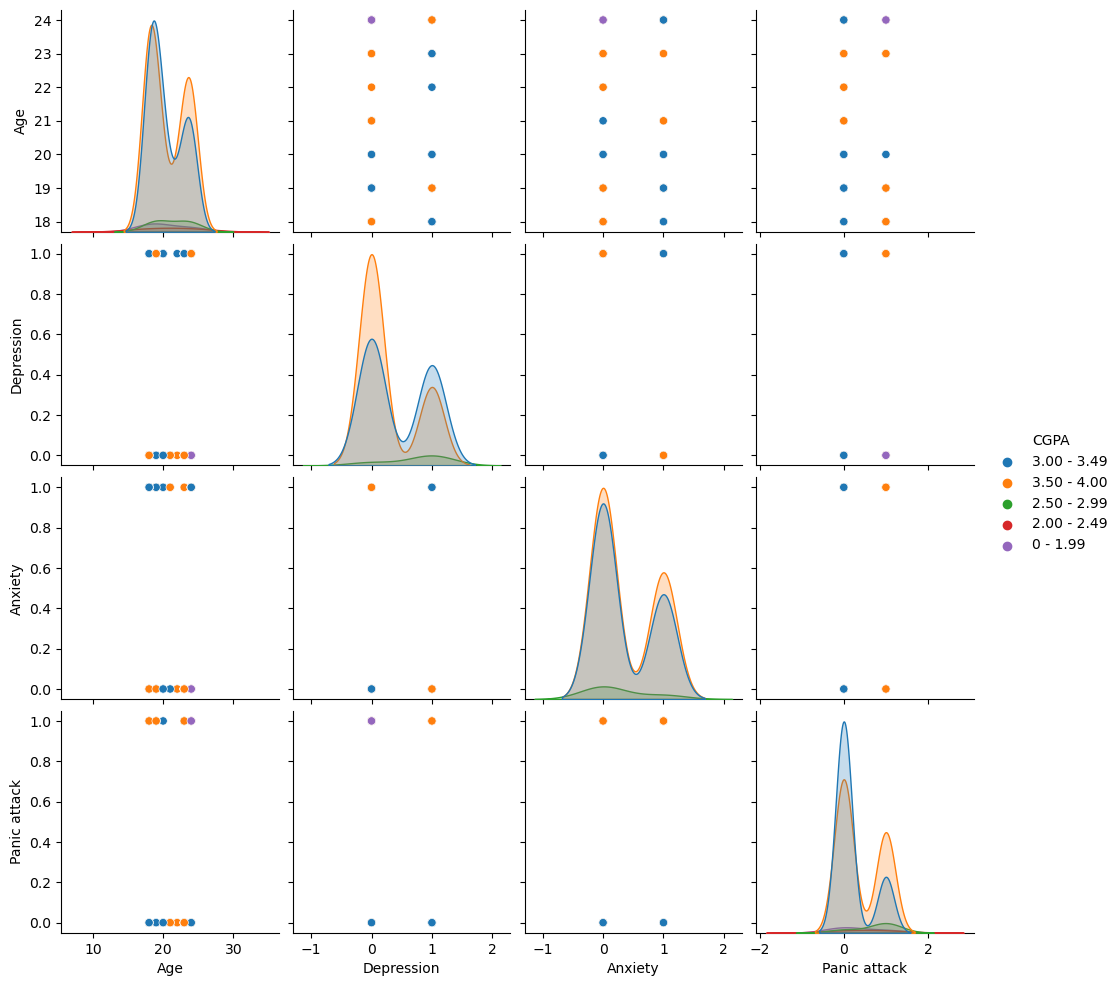

In [114]:
sns.pairplot(subset,hue='CGPA')

Exercise 5: Creating A Heatmap To Visualize Correlations

In [118]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Применение LabelEncoder к столбцу с категориями
subset['CGPA'] = label_encoder.fit_transform(subset['CGPA'])

C:\Users\v_gol\AppData\Local\Temp\ipykernel_4828\3600534091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['CGPA'] = label_encoder.fit_transform(subset['CGPA'])


In [120]:
subset

,Age,CGPA,Depression,Anxiety,Panic attack
0,18.0,3,1,0,1
1,21.0,3,0,1,0
2,19.0,3,1,1,1
3,22.0,3,1,0,0
4,23.0,3,0,0,0
...,...,...,...,...,...
96,21.0,4,0,1,0
97,18.0,3,1,1,0
98,19.0,4,1,0,1
99,23.0,4,0,0,0


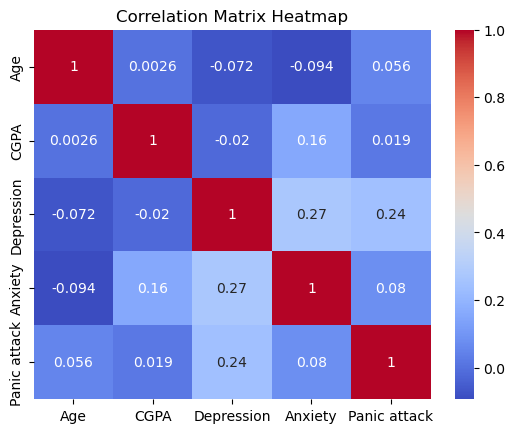

In [119]:
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

Exercise 6: Analyzing Distributions And Relationships Using

c:\Users\v_gol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


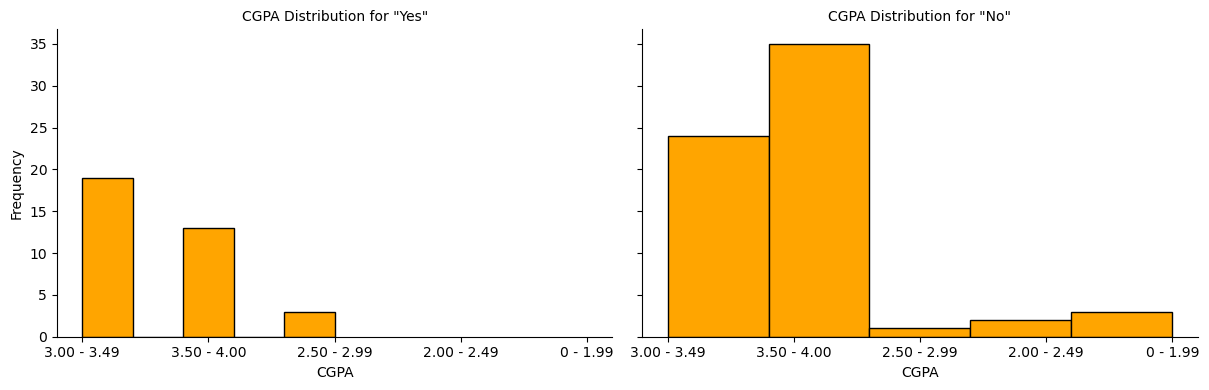

In [140]:
subset2 = mental_health[['Age','CGPA','Depression','Anxiety','Panic attack']]

grid = sns.FacetGrid(data=subset2, col='Depression',aspect=1.5,height=4)
grid.map(plt.hist,'CGPA',bins=5,color='orange', edgecolor='black')

grid.set_titles('CGPA Distribution for "{col_name}"')
grid.set_xlabels('CGPA')
grid.set_ylabels('Frequency')

plt.show()